In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### 1. Load Packages

In [30]:
import tensorflow as tf
from neural_structured_learning.tools import graph_utils
import neural_structured_learning as nsl
import tensorflow_addons as tfa

import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import random
import os
import PIL
import time

tf.keras.backend.clear_session()
print("tensorflow version:", tf.__version__)
print("keras version", tf.keras.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.experimental.list_physical_devices('GPU') else "NOT AVAILABLE")

tensorflow version: 2.3.0
keras version 2.4.0
Eager mode:  True
GPU is available


### 2. Generate AD Images TFRecord files

In [24]:
from python_files.graph_data_processing import GraphDataProcess

In [41]:
''' label definition: NonDemented - 0, VeryMildDemented - 1, MildDemented -2, ModerateDemented -3 '''
label_list = ['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']
root_path = './project_dataset/graph_images/'

'''rename images in the graph_image folder'''
# GraphDataProcess.rename_images(label_list, root_path) 

'''count each label images'''
NUM=[]
for label in label_list: NUM.append(len(os.listdir(f'{root_path}{label}/')))
NUM

[3200, 2240, 896, 64]

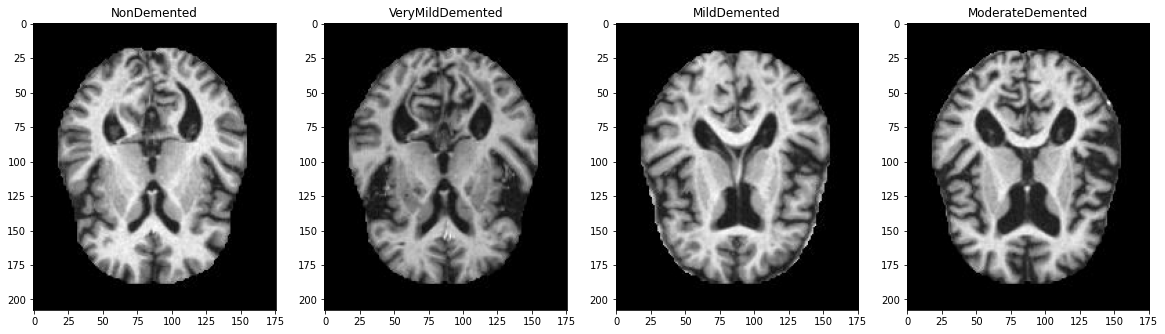

In [42]:
'''label image plotting'''
plt.figure(figsize=(20,20))
for index, label in enumerate(label_list):
    image_string = open(f'{root_path}{label_list[index]}/{index}_0.jpg', 'rb').read()
    image_tensor = tf.io.decode_jpeg(contents=image_string, channels=3, name=None)
    image_tensor = tf.image.resize(image_tensor, size=(208,176))
    ax = plt.subplot(1, 4, index + 1)
    plt.imshow(image_tensor/255)
    plt.title(label_list[index])

In [43]:
'''split data into both train and test folder'''
GraphDataProcess.setup_train_test_folders(root_path, label_list, 0.7)

train_data_size/label(rougly):  2240
test_data_size/label(rougly):  960
NonDemented folder is split...


FileNotFoundError: [Errno 2] No such file or directory: './project_dataset/graph_images/VeryMildDemented/1_3106.jpg'